This notebook demonstrates how to do Meanshift from scratch on a 2D space. This can be modified to support N-dimensional if needed. This implementation is naive and has a lot of rooms for optimization, but I think reading some naive code still helps a lot to understand.

This is the code that accompanies the article at http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from sklearn.datasets import *
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 12

Generate a set of 100 datapoints from 4 clusters. We will also ploit it out to see what it looks like.

(100, 2)


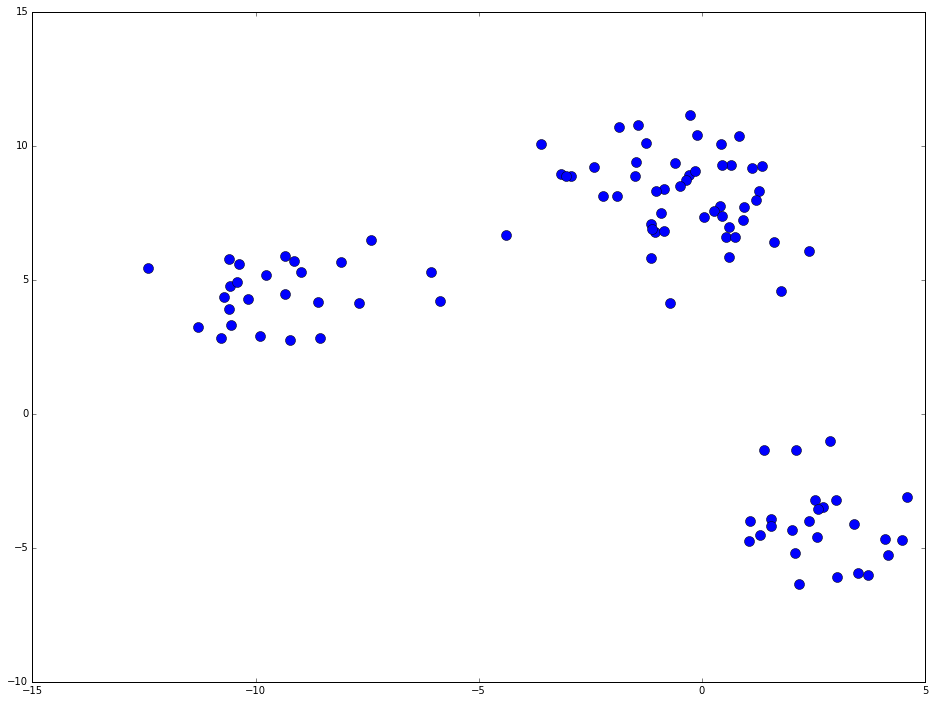

In [2]:
original_X, X_shapes = make_blobs(100, 2, centers=4, cluster_std=1.3)
print(original_X.shape)
plt.plot(original_X[:,0], original_X[:,1], 'bo', markersize = 10)

Define the Euclidean Distance function used for evaluating the neighbour of points.
Define the Gaussian Kernel used for calculating the Meanshift Vector.

In [3]:
def euclid_distance(x, xi):
    return np.sqrt(np.sum((x - xi)**2))

def neighbourhood_points(X, x_centroid, distance = 5):
    eligible_X = []
    for x in X:
        distance_between = euclid_distance(x, x_centroid)
        # print('Evaluating: [%s vs %s] yield dist=%.2f' % (x, x_centroid, distance_between))
        if distance_between <= distance:
            eligible_X.append(x)
    return eligible_X

def gaussian_kernel(distance, bandwidth):
    val = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((distance / bandwidth))**2)
    return val

Pick the parameters on how to select neighbouring points and the parameters of the kernel. This will need to be tuned for different datasets. For example, the kernel bandwidith can be estimated using the [sklearn.cluster.estimate_bandwidth](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html). In our case, we will keep things simple and pick a reasonable number.

In [4]:
look_distance = 6  # How far to look for neighbours.
kernel_bandwidth = 4  # Kernel parameter.

The Meanshift Algorithm in action. For more details, refer to [the article](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/).

1. For each datapoint *x* &#x2208; *X*, find the neighbouring points *N(x)* of *x*.
2. For each datapoint *x* &#x2208; *X*, calculate the ***mean shift*** *m(x)*.
3. For each datapoint *x* &#x2208; *X*, update *x* &#x2190; *m(x)*.
4. Repeat 1. for *n_iterations* or until the points are almost not moving or not moving.

You can change the *n_iterations* below to run more iterations of Meanshift.

In [5]:
X = np.copy(original_X)
# print('Initial X: ', X)

past_X = []
n_iterations = 5
for it in range(n_iterations):
    # print('Iteration [%d]' % (it))    

    for i, x in enumerate(X):
        ### Step 1. For each datapoint x ∈ X, find the neighbouring points N(x) of x.
        neighbours = neighbourhood_points(X, x, look_distance)
        # print('[%s] has neighbours [%d]' % (x, len(neighbours)))
        
        ### Step 2. For each datapoint x ∈ X, calculate the mean shift m(x).
        numerator = 0
        denominator = 0
        for neighbour in neighbours:
            distance = euclid_distance(neighbour, x)
            weight = gaussian_kernel(distance, kernel_bandwidth)
            numerator += (weight * neighbour)
            denominator += weight
        
        new_x = numerator / denominator
        
        ### Step 3. For each datapoint x ∈ X, update x ← m(x).
        X[i] = new_x
    
    # print('New X: ', X)
    past_X.append(np.copy(X))

Now let us visualize what happens with the datapoints.

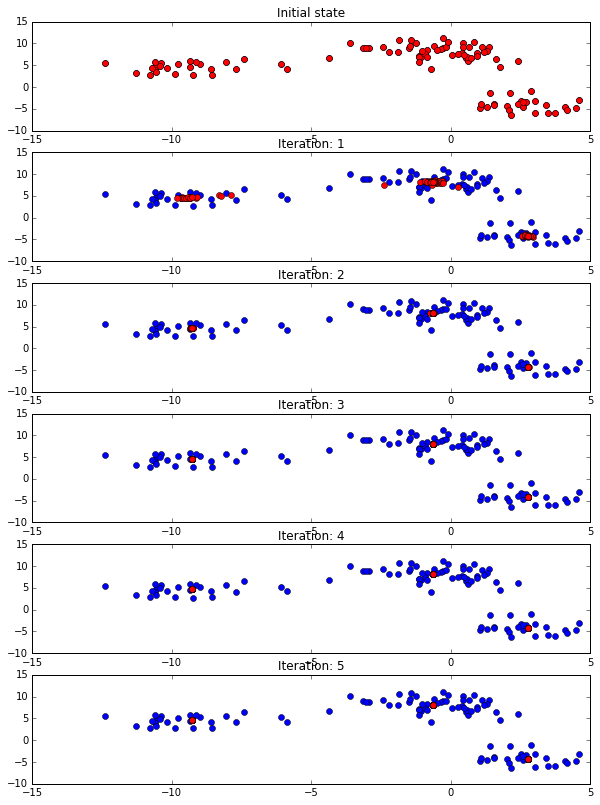

In [6]:
figure = plt.figure(1)
figure.set_size_inches((10, 16))
plt.subplot(n_iterations + 2, 1, 1)
plt.title('Initial state')
plt.plot(original_X[:,0], original_X[:,1], 'bo')
plt.plot(original_X[:,0], original_X[:,1], 'ro')

for i in range(n_iterations):
    figure_index = i + 2
    plt.subplot(n_iterations + 2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_X[:,0], original_X[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')

References:
- https://en.wikipedia.org/wiki/Mean_shift
- https://spin.atomicobject.com/2015/05/26/mean-shift-clustering/